In [3]:
 !git clone https://huggingface.co/spaces/Vikas01/gender-age-detection

Cloning into 'gender-age-detection'...
remote: Enumerating objects: 25, done.
remote: Total 25 (delta 0), reused 0 (delta 0), pack-reused 25 (from 1)
Unpacking objects: 100% (25/25), 136.17 KiB | 697.00 KiB/s, done.


In [2]:
#!pip install tensorflow keras opencv-python pillow matplotlib


In [6]:
import cv2
import numpy as np
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files


In [7]:
import os
os.chdir('/content/gender-age-detection')

## Geneder Classification

In [8]:
gender_model = load_model('gender_model_pretrained.h5')

/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [9]:
gender_ranges = ['male', 'female']


In [10]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

if face_cascade.empty():
    raise IOError("Haar cascade file not found")


In [11]:
image_path = 'testimage.jpg'
image = Image.open(image_path).convert("RGB")
image = np.array(image)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)


In [12]:
i = 0

for (x, y, w, h) in faces:
    i += 1
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

    img_gray = gray[y:y+h, x:x+w]


    # Gender
    gender_img = cv2.resize(img_gray, (100, 100))
    gender_input = np.expand_dims(gender_img, axis=0)
    gender_input = np.expand_dims(gender_input, axis=-1)
    output_gender = gender_ranges[np.argmax(gender_model.predict(gender_input))]

    label = f"{output_gender}"

    cv2.putText(image, label, (x, y-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)

    print(f"Face {i}: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
Face 1: female
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Face 2: male
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Face 3: female
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Face 4: male
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Face 5: male
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Face 6: female


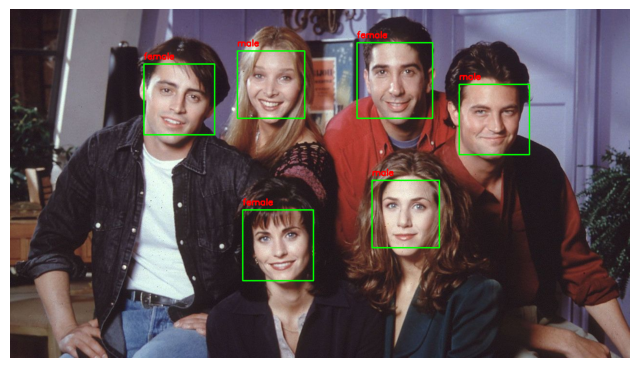

In [13]:
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.axis('off')
plt.show()


## Age Prediction

In [14]:
age_model = load_model('age_model_pretrained.h5')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
age_ranges = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30',
              '31-35','36-40','41-50','51-60','61-70','71-80','81-90']

In [22]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

if face_cascade.empty():
    raise IOError("Haar cascade file not found")


In [23]:
image_path = 'testimage.jpg'
image = Image.open(image_path).convert("RGB")
image = np.array(image)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)


In [25]:
i = 0

for (x, y, w, h) in faces:
    i += 1
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

    img_gray = gray[y:y+h, x:x+w]

    # Age
    age_img = cv2.resize(img_gray, (200, 200))
    age_input = age_img.reshape(-1, 200, 200, 1)
    output_age = age_ranges[np.argmax(age_model.predict(age_input))]

    label = f"{output_age}"
    cv2.putText(image, label, (x, y-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)

    print(f"Face {i}: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Face 1: 21-25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Face 2: 21-25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Face 3: 16-20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Face 4: 21-25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Face 5: 16-20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Face 6: 11-15


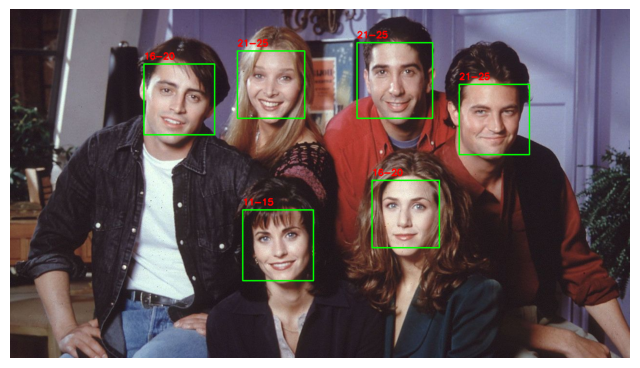

In [26]:
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.axis('off')
plt.show()


## Emotion Recognition

In [27]:
emotion_model = load_model('emotion_model_pretrained.h5')


In [28]:
emotion_ranges = ['positive','negative','neutral']


In [29]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

if face_cascade.empty():
    raise IOError("Haar cascade file not found")


In [30]:
image_path = 'testimage.jpg'
image = Image.open(image_path).convert("RGB")
image = np.array(image)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)


In [31]:
i = 0

for (x, y, w, h) in faces:
    i += 1
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

    img_gray = gray[y:y+h, x:x+w]

    # Emotion
    emotion_img = cv2.resize(img_gray, (48, 48))
    emotion_input = np.expand_dims(emotion_img, axis=0)
    emotion_input = np.expand_dims(emotion_input, axis=-1)
    output_emotion = emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]


    label = f"{output_emotion}"
    cv2.putText(image, label, (x, y-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)

    print(f"Face {i}: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Face 1: positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Face 2: positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Face 3: positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Face 4: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Face 5: positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Face 6: positive


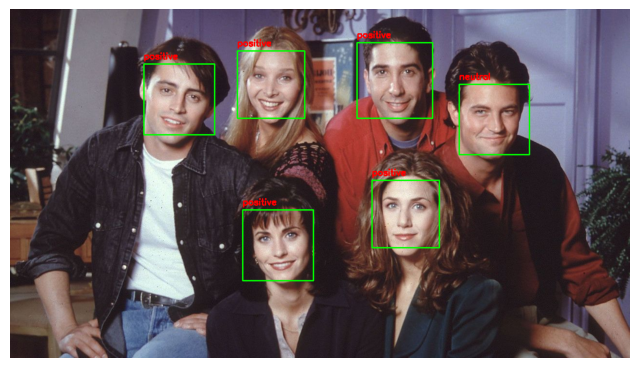

In [32]:
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')